# <span style='font-family:"Times New Roman"'><font color='Midnightblue'> **Hospital Ward Dynamic Contact**

<img src = "https://www.thetimes.co.uk/imageserver/image/%2Fmethode%2Ftimes%2Fprod%2Fweb%2Fbin%2F8ca0aa76-24b6-11e9-b782-40e94f317da5.jpg?crop=3134%2C1763%2C0%2C163" width=60%>

#### <span style='font-family:"Times New Roman"'>

Hospital-acquired infections (HAI) are one of the main public health issues that have unacceptable consequences. One of the main tranmission routes of diseases has observed to be through some of the interactions of patients and a variety of health care workers. Therefore, the study to understand such complex interactions can provide a greater insight into HAIs epidemiology and be particularly useful for the design and validation process of infection prevention and control intervention measures.
For this purpose, I have applied the concept of simplicial complexes to study and understand the interactions that are taking place in a hospital ward and plot them based on their nature. The dataset has been acquired through SocioPatterns and can be accessed through the article and website provided below.

In [ ]:
#By Ysmin-g

# P. Vanhems et al., Estimating Potential Infection Transmission Routes in 
# Hospital Wards Using Wearable Proximity Sensors, PLoS ONE 8(9): e73970 (2013). 
# Dataset acquired through http://www.sociopatterns.org.

In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np

import itertools
import xgi

import plotly.graph_objects as go

In [ ]:
#loading the dataset
df_raw=pd.read_csv('/content/detailed_list_of_contacts_Hospital.dat_.gz', compression='gzip', 
                                 header=None, sep=' ')
df_raw.head()

,0
0,140\t1157\t1232\tMED\tADM
1,160\t1157\t1191\tMED\tMED
2,500\t1157\t1159\tMED\tMED
3,520\t1157\t1159\tMED\tMED
4,560\t1159\t1191\tMED\tMED


In [ ]:
#seperating columns in the dataset
def raw_to_df(df_raw):
  l=[]
  for row in range(len(df_raw[0])):
    a=df_raw[0][row].split("\t")
    l.append(a)
  df_res=pd.DataFrame(l, columns=["Time", "i", "j", "iRole","jRole"])
  return df_res

df_social=raw_to_df(df_raw)
df_social.sort_values('Time')
df_social.head()

,Time,i,j,iRole,jRole
0,140,1157,1232,MED,ADM
1,160,1157,1191,MED,MED
2,500,1157,1159,MED,MED
3,520,1157,1159,MED,MED
4,560,1159,1191,MED,MED


In [ ]:
df_social[df_social['i']==str(1193)]

,Time,i,j,iRole,jRole,contact id str,list of ids
62,4240,1193,1232,NUR,ADM,"1193,1232","[1232, 1193]"
66,4260,1193,1295,NUR,NUR,"1193,1295","[1193, 1295]"
72,4280,1193,1295,NUR,NUR,"1193,1295","[1193, 1295]"
76,4300,1193,1295,NUR,NUR,"1193,1295","[1193, 1295]"
81,4320,1193,1295,NUR,NUR,"1193,1295","[1193, 1295]"
...,...,...,...,...,...,...,...
25966,264200,1193,1205,NUR,NUR,"1193,1205","[1193, 1205]"
25977,264260,1193,1658,NUR,ADM,"1193,1658","[1193, 1658]"
25980,264280,1193,1202,NUR,NUR,"1193,1202","[1193, 1202]"
25981,264280,1193,1295,NUR,NUR,"1193,1295","[1193, 1295]"


In [ ]:
t=list(df_social['Time'].unique())
t_int=[int(x) for x in t]
print("The time length of contacts ranges from {} to {}".format(min(t_int),max(t_int)))
print("and there are a total of {} unique time values".format(len(t)))

The time length of contacts ranges from 140 to 347640
and there are a total of 9453 unique time values


## <span style='font-family:"Times New Roman"'><font color='Midnightblue'> Understanding the roles and their percentage in the interactions

In [ ]:
conroles_list1=df_social[['iRole', 'jRole']].values.tolist()
conroles_list2=[list(x) for x in set(tuple(x) for x in conroles_list1)]
roles = {x for l in conroles_list2 for x in l}
print("There are also a total of {} unique hospital roles".format(len(roles)))

There are also a total of 4 unique hospital roles


In [ ]:
print(roles)

{'MED', 'ADM', 'PAT', 'NUR'}


In [ ]:
#create dataframe with id and role
roles_list1=df_social[['i', 'iRole']].values.tolist()
roles_list2=df_social[['j', 'jRole']].values.tolist()
roles_list3=roles_list1+roles_list2

roles_list4=[list(x) for x in set(tuple(x) for x in roles_list3)]
df_roles=pd.DataFrame(roles_list4, columns =['id', 'role'])
df_roles

,id,role
0,1399,PAT
1,1152,MED
2,1148,MED
3,1157,MED
4,1295,NUR
...,...,...
70,1525,ADM
71,1116,NUR
72,1159,MED
73,1629,NUR


In [ ]:
df_roles1=df_roles.groupby(['role']).size().reset_index(name ='Total members')

df_roles1

,role,Total members
0,ADM,8
1,MED,11
2,NUR,27
3,PAT,29


### <span style='font-family:"Times New Roman"'><font color='Midnightblue'> Pie plot of the roles

In [ ]:
#plot pie plot of roles


In [ ]:
val_map = {'NUR':"#00D37B"
           , 'MED':"#6267C1"
           , 'ADM':"#FF6D00"
           , 'PAT': "#B5179E"}

In [ ]:
df_roles1['color'] = df_roles1['role'].map(val_map)

In [ ]:
fig = go.Figure(data=[go.Pie(labels=df_roles1['role'], values=df_roles1['Total members'],textinfo='label',
                     name='Contact Roles', 
                     marker_colors=df_roles1['color'],hole=0.5)])
fig.show()

## <span style='font-family:"Times New Roman"'><font color='Midnightblue'> Understanding the simultaneous contacts at each time period of 40 seconds

In [ ]:
#now checking to see the the simultaneous contacts at each time

In [ ]:
df2 = df_social.groupby(['Time']).size().reset_index(name ='Total Contacts')
df2.groupby(['Total Contacts']).size().reset_index(name ='Number of Contacts')

,Total Contacts,Number of Contacts
0,1,2402
1,2,1767
2,3,1452
3,4,1240
4,5,963
5,6,647
6,7,380
7,8,220
8,9,147
9,10,86


In [ ]:
df_social['contact id str']=df_social['i']+','+ df_social['j']
df_social.tail()

,Time,i,j,iRole,jRole,contact id str
32419,347600,1295,1629,NUR,NUR,"1295,1629"
32420,347600,1383,1629,PAT,NUR,"1383,1629"
32421,347620,1232,1295,ADM,NUR,"1232,1295"
32422,347620,1383,1629,PAT,NUR,"1383,1629"
32423,347640,1295,1629,NUR,NUR,"1295,1629"


In [ ]:
#now getting the unique ids that have been a member of the contacts

def convert_str(string):
    li = list(string.split(","))
    li=list(map(int, li))
    li2=list(set(li))
    return li2

df_social['list of ids']=df_social['contact id str'].apply(convert_str)


In [ ]:
df_social.tail()

,Time,i,j,iRole,jRole,contact id str,list of ids
32419,347600,1295,1629,NUR,NUR,"1295,1629","[1629, 1295]"
32420,347600,1383,1629,PAT,NUR,"1383,1629","[1629, 1383]"
32421,347620,1232,1295,ADM,NUR,"1232,1295","[1232, 1295]"
32422,347620,1383,1629,PAT,NUR,"1383,1629","[1629, 1383]"
32423,347640,1295,1629,NUR,NUR,"1295,1629","[1629, 1295]"


In [ ]:
df_social['Time']=df_social['Time'].apply(int)
df_tids=df_social.groupby('Time')['list of ids'].apply(list).reset_index().rename(columns = {'index':'Time'})
df_tids=df_tids.sort_values(by=['Time'], ascending=True)
df_tids.tail()

,Time,list of ids
9448,347560,"[[1629, 1295], [1383, 1295]]"
9449,347580,"[[1629, 1295]]"
9450,347600,"[[1629, 1295], [1629, 1383]]"
9451,347620,"[[1232, 1295], [1629, 1383]]"
9452,347640,"[[1629, 1295]]"


In [ ]:
df_tids['type']=0
for i in range(0,9451,2):
  df_tids['type'][i]=df_tids['Time'][i]
  df_tids['type'][i+1]=df_tids['Time'][i]
df_tids['type'][9452]=df_tids['Time'][9452]


In [ ]:
df_tids.tail()

,Time,list of ids,type
9448,347560,"[[1629, 1295], [1383, 1295]]",347560
9449,347580,"[[1629, 1295]]",347560
9450,347600,"[[1629, 1295], [1629, 1383]]",347600
9451,347620,"[[1232, 1295], [1629, 1383]]",347600
9452,347640,"[[1629, 1295]]",347640


In [ ]:
df_conseca=df_tids.groupby('type')['list of ids'].apply(sum)
df_conseca=df_conseca.reset_index().rename(columns = {'index':'Time'})

df_consec=pd.DataFrame(df_conseca)

In [ ]:
df_consec

,type,list of ids
0,140,"[[1232, 1157], [1157, 1191]]"
1,500,"[[1157, 1159], [1157, 1159]]"
2,560,"[[1191, 1159], [1191, 1159]]"
3,600,"[[1191, 1159], [1191, 1159]]"
4,680,"[[1191, 1159], [1144, 1159], [1144, 1191]]"
...,...,...
4722,347480,"[[1383, 1295], [1629, 1295], [1629, 1383], [13..."
4723,347520,"[[1383, 1295], [1383, 1295]]"
4724,347560,"[[1629, 1295], [1383, 1295], [1629, 1295]]"
4725,347600,"[[1629, 1295], [1629, 1383], [1232, 1295], [16..."


## <span style='font-family:"Times New Roman"'><font color='Midnightblue'> Merging the simultaneous interactions among numerous members in each period 

In [ ]:
def join_commons(li2):
  pooled = [set(subList) for subList in li2]
  merging = True
  while merging:
    merging=False
    for i,group in enumerate(pooled):
      merged = next((g for g in pooled[i+1:] if g.intersection(group)),None)
      if not merged: continue
      group.update(merged)
      pooled.remove(merged)
      merging = True 
  return pooled


In [ ]:
df_consec['relation']=0
for i in range(4727):
  a=df_consec['list of ids'][i]
  b=join_commons(a)
  df_consec['relation'][i]=b

In [ ]:
df_consec.tail()

,type,list of ids,relation
4722,347480,"[[1383, 1295], [1629, 1295], [1629, 1383], [13...","[{1295, 1629, 1383}]"
4723,347520,"[[1383, 1295], [1383, 1295]]","[{1295, 1383}]"
4724,347560,"[[1629, 1295], [1383, 1295], [1629, 1295]]","[{1383, 1629, 1295}]"
4725,347600,"[[1629, 1295], [1629, 1383], [1232, 1295], [16...","[{1232, 1383, 1629, 1295}]"
4726,347640,"[[1629, 1295]]","[{1629, 1295}]"


In [ ]:
#joining all the columns into a large list of interactions
consec_lista= list(df_consec['relation'].explode())
#removing duplicates
consec_list=[set(item) for item in set(frozenset(item) for item in consec_lista)]

In [ ]:
#converting sets to lists
relations_li=[list(x) for x in consec_list]

In [ ]:
#print max and min length of simplexes
max_rlen=max(len(l) for l in relations_li)
min_rlen=min(len(l) for l in relations_li)
print("The maximum length of simplices are: "+str(max_rlen))
print("The minimum length of simplices are: "+str(min_rlen))

The maximum length of simplices are: 13
The minimum length of simplices are: 2


### <span style='font-family:"Times New Roman"'><font color='Midnightblue'>Since there is a maximum length of 13 related interactions, it is higher than the 4-dimensional simplices that we can depict, I will be filtering the interactions with more than 4 members, and will be replacing them with smaller, inter-connected simplices.

In [ ]:
import random
def chunks(l, n):
   li = [l[i:i+n] for i in range(0, len(l)-2, n-2)]
   #Add the second last sublist to the last sublist
   #Only if the last sublist is not of size n
   if len(li[-1]) != n:
     a=n-len(li[-1])
     la= [x for x in l if x not in li[-1]]
     ra=random.sample(la,a)
     li[-1]=li[-1]+ra
   return li

In [ ]:
nrelations_li=relations_li.copy()

In [ ]:
#transforming those with higher than 4 relations into smaller simplices due to computation limits
for i in range(len(nrelations_li)):
  a=len(nrelations_li[i])
  if a>4:
    la=nrelations_li[i]
    ca=chunks(la,4)
    nrelations_li.remove(nrelations_li[i])
    for j in range(len(ca)):
      nrelations_li.append(ca[j])

In [ ]:
#converting all tos strings to match
for i in range(len(nrelations_li)):
  for j in range(len(nrelations_li[i])):
    nrelations_li[i][j]=str(nrelations_li[i][j])

## <span style='font-family:"Times New Roman"'><font color='Midnightblue'> Defining and plotting the acquired simplicial complex

In [ ]:
#creating the simplicial complex

In [ ]:
x=xgi.SimplicialComplex()

In [ ]:
for i in range(len(nrelations_li)):
  x.add_simplex(nrelations_li[i])

In [ ]:
#plotting the simplicial complex
#making the nodes colors match their role color

In [ ]:
df_roles['color'] = df_roles['role'].map(val_map)

In [ ]:
dict_val=dict(df_roles[['id','color']].values)

In [ ]:
print(f"This simplicial complex has {x.num_nodes} nodes and {x.num_edges} edges")

This simplicial complex has 75 nodes and 6494 edges


In [ ]:
pos= xgi.pairwise_spring_layout(x)

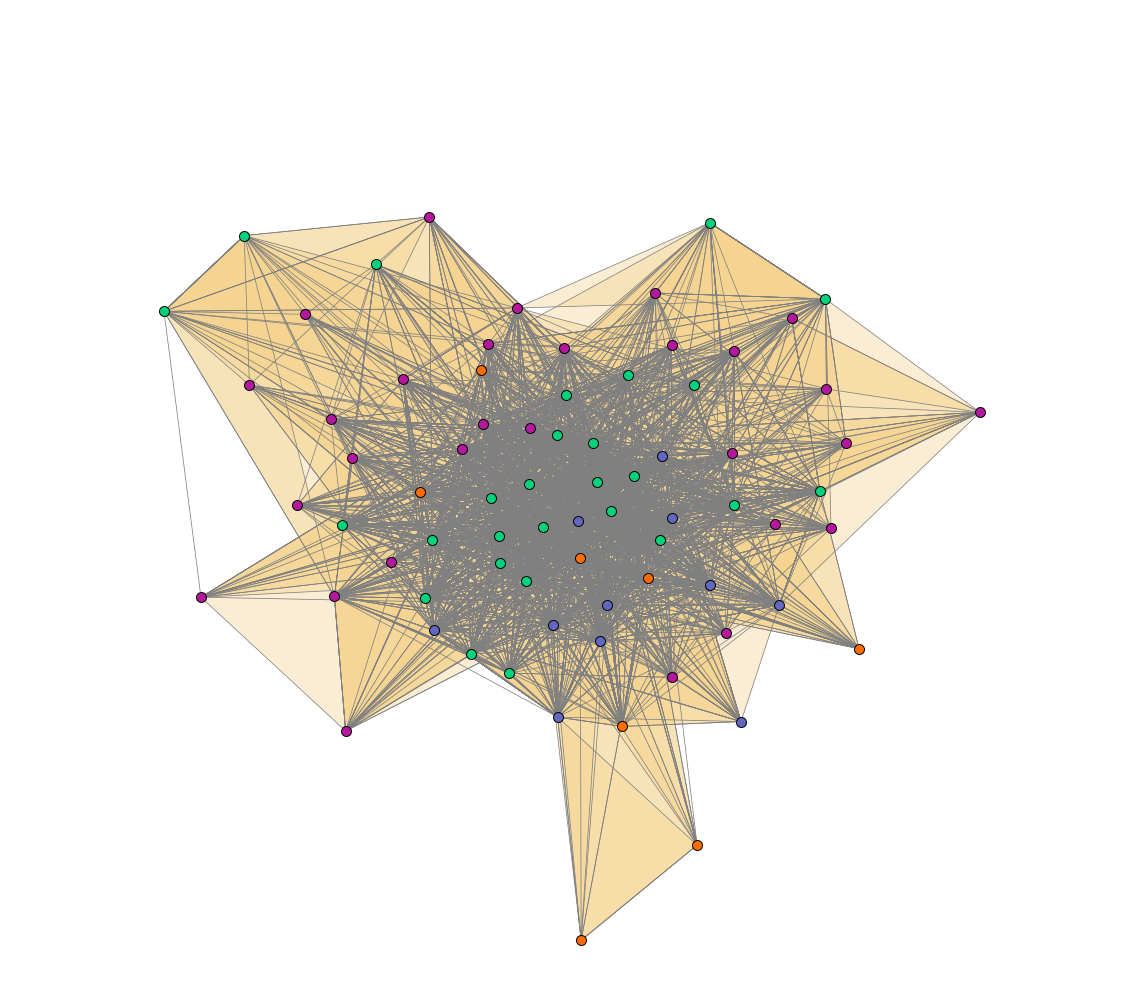

In [ ]:
plt.figure(figsize=(20, 18))

xgi.draw(
    x,
    pos,
    dyad_lw=0.75, 
    edge_fc="#f5d491",
    edge_lw=0.9,
    node_fc=dict_val,
    dyad_color="grey"
)
